In [1]:
import pandas 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('yfl_dataset.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
df.shape

(99989, 3)

## Data Preprocessing

In [5]:
lm = WordNetLemmatizer()
corpus = []

In [6]:
for i in range(len(df['SentimentText'])):
    review = re.sub('[^a-zA-Z]', ' ', df['SentimentText'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
corpus[:10]

['sad apl friend',
 'missed new moon trailer',
 'omg already',
 'omgaga im sooo im gunna cry dentist since suposed get crown put min',
 'think mi bf cheating',
 'worry much',
 'juuuuuuuuuuuuuuuuussssst chillin',
 'sunny work tomorrow tv tonight',
 'handed uniform today miss already',
 'hmmmm wonder number']

In [79]:
df['Processed_text'] = corpus
df.head()

,ItemID,Sentiment,SentimentText,Processed_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating


## Visualising the Data

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [61]:
df['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

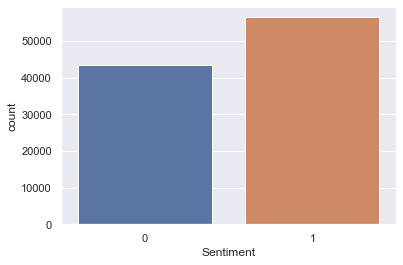

In [62]:
ax = sns.countplot(data = df, x = 'Sentiment')

### WordCloud

In [63]:
corpus_str = ' '.join(corpus)
corpus_str = str(corpus_str)

In [73]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords = stopwords, max_words = 50,
                      background_color="white").generate(corpus_str)

(-0.5, 399.5, 199.5, -0.5)

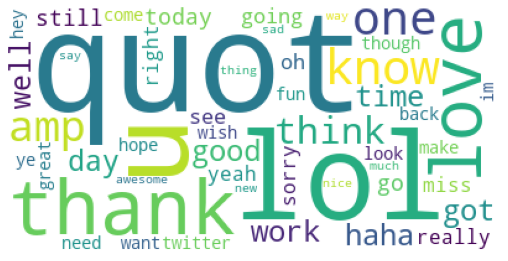

In [90]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.imshow(wordcloud)
ax.axis("off")

In [81]:
negative = df[df['Sentiment'] == 0]
positive = df[df['Sentiment'] == 1]
negative.head()

,ItemID,Sentiment,SentimentText,Processed_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating
5,6,0,or i just worry too much?,worry much


In [84]:
negative_str = ' '.join(negative['Processed_text'])
positive_str = ' '.join(positive['Processed_text'])

Text(0.5, 1.0, 'Tweets with Negative Sentiments')

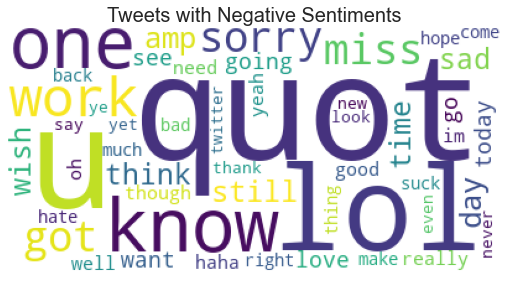

In [88]:
#Generate wordcloud data
negative_wordcloud = WordCloud(stopwords = stopwords, max_words = 50,
                      background_color="white").generate(negative_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(negative_wordcloud)
ax1.axis("off")
ax1.set_title('Tweets with Negative Sentiments',fontsize=20)

Text(0.5, 1.0, 'Tweets with Positive Sentiments')

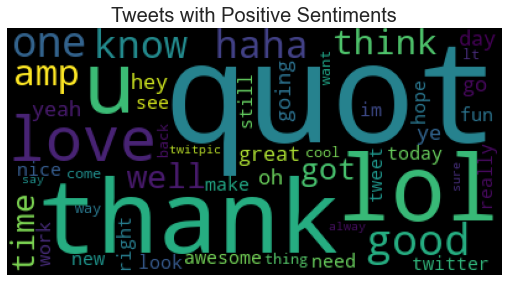

In [92]:
positive_wordcloud = WordCloud(stopwords = stopwords, max_words = 50,
                      background_color="black").generate(positive_str)
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(211)
ax2.imshow(positive_wordcloud)
ax2.axis("off")
ax2.set_title('Tweets with Positive Sentiments',fontsize=20)

# Bag of Words Model

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()

In [9]:
X = pd.DataFrame(X)
X.head()

<IPython.core.display.Javascript object>

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     1     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [10]:
X = X.astype('uint8')

In [11]:
y = df['Sentiment']
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: Sentiment, dtype: int64

### Train - Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [13]:
X_train.shape

(79991, 2500)

In [14]:
X_test.shape

(19998, 2500)

### Naive Bayes for Classification

In [15]:
from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(X_train, y_train)

In [34]:
y_pred = sentiment_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [17]:
def print_metrics(y_test, y_pred):
    print('ACCURACY: ', round(accuracy_score(y_test, y_pred), 3), '\t', 
          'PRECISION: ', round(precision_score(y_test, y_pred), 3), '\t',
          'RECALL :', round(recall_score(y_test, y_pred), 3))

In [18]:
print_metrics(y_test, y_pred)

ACCURACY:  0.737 	 PRECISION:  0.752 	 RECALL : 0.794


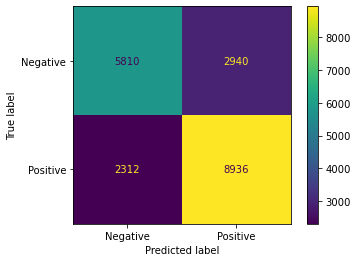

In [35]:
plot_confusion_matrix(sentiment_model, X_test, y_test, values_format = 'd',
                      display_labels = ['Negative', 'Positive'])

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

sentiment_model2 = RandomForestClassifier(n_estimators=100)
sentiment_model2.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = sentiment_model2.predict(X_test)

In [30]:
print_metrics(y_test, y_pred)

ACCURACY:  0.718 	 PRECISION:  0.739 	 RECALL : 0.77


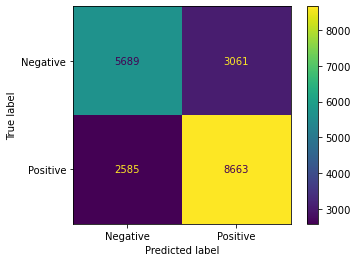

In [36]:
plot_confusion_matrix(sentiment_model2, X_test, y_test, values_format = 'd', display_labels = ['Negative', 'Positive'])

# TF-IDF Model

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 2500)
X1 = cv.fit_transform(corpus).toarray()

In [23]:
X1 = pd.DataFrame(X)
X1.head()

<IPython.core.display.Javascript object>

0     1     2     3     4     5     6     7     8     9     10    11    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   72    73    74    75    76    77    78        79    80    81    82    83    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.692949   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
tf_idfnb = MultinomialNB().fit(X_train, y_train)

y_pred = tf_idfnb.predict(X_test)

In [41]:
print_metrics(y_test, y_pred)

ACCURACY:  0.731 	 PRECISION:  0.725 	 RECALL : 0.837


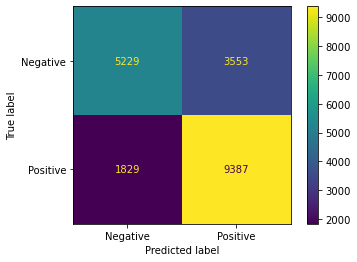

In [42]:
plot_confusion_matrix(tf_idfnb, X_test, y_test, values_format = 'd', display_labels = ['Negative', 'Positive'])

## Using Vader

In [101]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [102]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Processed_text']:
    
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
    
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

<IPython.core.display.Javascript object>

,neg,neu,pos,compound
0,0.425,0.137,0.438,0.0258
1,0.423,0.577,0.000,-0.2960
2,0.000,1.000,0.000,0.0000
3,0.205,0.795,0.000,-0.4767
4,0.545,0.455,0.000,-0.5574


In [103]:
# Merging the sentiments back to reviews dataframe
df_vader = pd.concat([df.reset_index(drop=True), df_sentiments], axis = 1)
df_vader.head()

<IPython.core.display.Javascript object>

,ItemID,Sentiment,SentimentText,Processed_text,neg,neu,pos,compound
0,1,0,is so sad for my APL frie...,sad apl friend,0.425,0.137,0.438,0.0258
1,2,0,I missed the New Moon trail...,missed new moon trailer,0.423,0.577,0.000,-0.2960
2,3,1,omg its already 7:30 :O,omg already,0.000,1.000,0.000,0.0000
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...,0.205,0.795,0.000,-0.4767
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating,0.545,0.455,0.000,-0.5574


In [104]:
# Convert scores into positive and negetive sentiments using some threshold
df_vader['Predicted Sentiment'] = np.where(df_vader['compound'] >= 0 , 'Positive','Negative')
df_vader.head()

<IPython.core.display.Javascript object>

,ItemID,Sentiment,SentimentText,Processed_text,neg,neu,pos,compound,Predicted Sentiment
0,1,0,is so sad for my APL frie...,sad apl friend,0.425,0.137,0.438,0.0258,Positive
1,2,0,I missed the New Moon trail...,missed new moon trailer,0.423,0.577,0.000,-0.2960,Negative
2,3,1,omg its already 7:30 :O,omg already,0.000,1.000,0.000,0.0000,Positive
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...,0.205,0.795,0.000,-0.4767,Negative
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating,0.545,0.455,0.000,-0.5574,Negative


In [108]:
df_vader['Predicted_Sentiment'] = df_vader['Predicted Sentiment'].map({'Positive': 1, 'Negative': 0})
df_vader.drop(['Predicted Sentiment', 'neg', 'neu', 'pos', 'compound'], axis = 1)

,ItemID,Sentiment,SentimentText,Processed_text,Predicted_Sentiment
0,1,0,is so sad for my APL frie...,sad apl friend,1
1,2,0,I missed the New Moon trail...,missed new moon trailer,0
2,3,1,omg its already 7:30 :O,omg already,1
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...,0
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating,0
...,...,...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...,cupcake seems like repeating problem hope able...,1
99985,99997,1,@cupcake__ arrrr we both replied to each other...,cupcake arrrr replied different tweet time see...,0
99986,99998,0,@CuPcAkE_2120 ya i thought so,cupcake ya thought,1
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,cupcake dollie yes yes glad fun,1


In [120]:
print_metrics(df_vader['Sentiment'], df_vader['Predicted_Sentiment'])

ACCURACY:  0.659 	 PRECISION:  0.64 	 RECALL : 0.905


## Textblob

In [115]:
from textblob import TextBlob
df['Polarity'] = df['Processed_text'].apply(lambda tweet: TextBlob(tweet).sentiment[0])
df['subjectivity'] = df['Processed_text'].apply(lambda tweet: TextBlob(tweet).sentiment[1])

In [116]:
df.head()

,ItemID,Sentiment,SentimentText,Processed_text,Polarity,subjectivity
0,1,0,is so sad for my APL frie...,sad apl friend,-0.500000,1.000000
1,2,0,I missed the New Moon trail...,missed new moon trailer,0.136364,0.454545
2,3,1,omg its already 7:30 :O,omg already,0.000000,0.000000
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...,0.000000,0.000000
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating,0.000000,0.000000


In [118]:
df['PredictedSentiment'] = np.where((df['Polarity'] >= 0), 1, 0)
df.head()

<IPython.core.display.Javascript object>

,ItemID,Sentiment,SentimentText,Processed_text,Polarity,subjectivity,PredictedSentiment
0,1,0,is so sad for my APL frie...,sad apl friend,-0.500000,1.000000,0
1,2,0,I missed the New Moon trail...,missed new moon trailer,0.136364,0.454545,1
2,3,1,omg its already 7:30 :O,omg already,0.000000,0.000000,1
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...,0.000000,0.000000,1
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating,0.000000,0.000000,1


In [119]:
print_metrics(df['Sentiment'], df['PredictedSentiment'])

ACCURACY:  0.631 	 PRECISION:  0.617 	 RECALL : 0.91


Both TextBlob and Vader have great Recall.

**The Best Model is the Bag of Words model with Naive Bayes Classification -**
- ACCURACY:  0.737 	 
- PRECISION:  0.752 	 
- RECALL : 0.794